In [2]:
import dxchange
import dxchange.reader as dxreader
import numpy as np

astropy module not found


In [ ]:
#fname_is1 = '/zhome/35/c/147546/Lava_data/Island_ny/lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon.txm'
#fname_is2 = '/zhome/35/c/147546/Lava_data/Island_gammel/lavasten_Island_gammel_4X-80kV-LE5-55s-3.8micro_recon.txm'
#fname_is3 = '/zhome/35/c/147546/Lava_data/Island_gammel/lavasten_Island_gammel_LFOV-80kV-LE5-4s-45.3micro_recon.txm'
#fname_mad = '/zhome/35/c/147546/Lava_data/Madagascar/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon.txm'

In [ ]:

# Read the txrm raw data.
#data, metadata = dxreader.read_txrm(fname_is1)
#dxchange.write_tiff(data, fname='/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon')

#data, metadata = dxreader.read_txrm(fname_is2)
#dxchange.write_tiff(data, fname='/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/lavasten_Island_gammel_4X-80kV-LE5-55s-3.8micro_recon')

#data, metadata = dxreader.read_txrm(fname_is3)
#dxchange.write_tiff(data, fname='/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/lavasten_Island_gammel_LFOV-80kV-LE5-4s-45.3micro_recon')


In [ ]:

#data, metadata = dxreader.read_txrm(fname_mad)
# convert data to range 0-1

#dxchange.write_tiff(data, fname='/dtu/3d-imaging-center/courses/02509/groups/group01/data/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon')


In [ ]:
# load tiff files
path = "/dtu/3d-imaging-center/courses/02509/groups/group01/data/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon.tiff"
im = dxchange.reader.read_tiff(path)

In [ ]:
print(im.shape)

_, metadata = dxreader.read_txrm("/dtu/3d-imaging-center/courses/02509/groups/group01/Lava_data/Madagascar/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon.txm")

(1018, 1024, 1004)


In [ ]:
print(metadata)

{'facility': None, 'image_width': 1004, 'image_height': 1024, 'data_type': 5, 'number_of_images': 1018, 'pixel_size': 41.99748992919922, 'reference_filename': b'\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x06\x00\x02\x00t\n\x00\x00\xa0\xe9b\x00\x00\x00\x00\x00,\x00\xed\x00KH\x01\x00\xa0\xe9b\x00\x00\x00\x00\x00@\x14\x85w\x00\x00\x00\x00\x97%\xb3\xe4\xfe\x07\x00\x00`\x0f-4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\xc0\xf9r8\x00\x00\x00\x00Wj\xef\xf4\xfe\x07\x00\x00\x01\x00\x00\x00d\x00\x00\x00\xfe\xff\xff\xff\xff\xff\xff\xff\xfe\xff\xff\xff\xff\xff\xff\xff\xf5\x14\xa7\xe4\xfe\x07\x00\x00\xd0\x86Q4\x00\x00\x00\x0003\x024\x00\x00\x00\x00\xd0\x86Q4\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00`\x0f-4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
print(metadata["pixel_size"])

n_pix = int(np.ceil(5000/metadata["pixel_size"]))
print(n_pix)

41.99748992919922
120


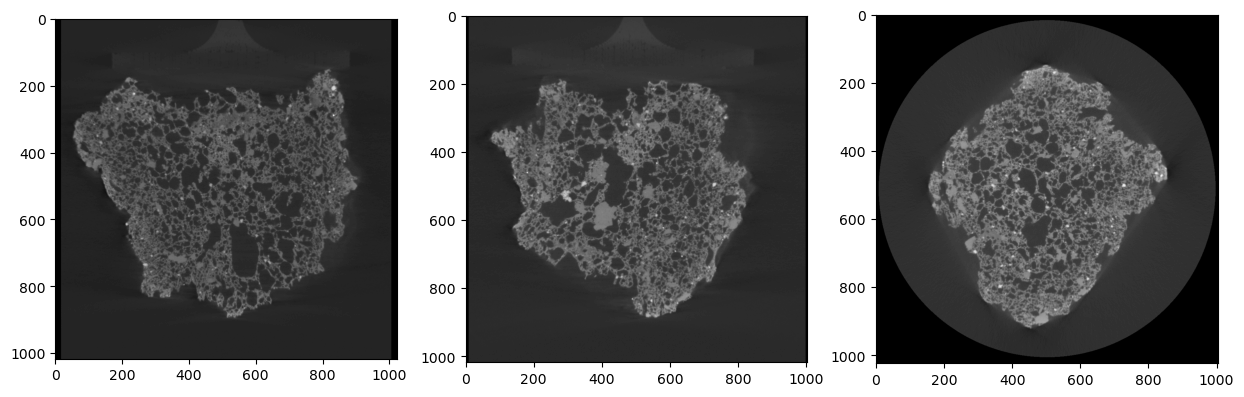

In [ ]:

# plot the image

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im[:,:,500], cmap='gray')

plt.subplot(1,3,2)
plt.imshow(im[:,500,:], cmap='gray')

plt.subplot(1,3,3)
plt.imshow(im[500,:,:], cmap='gray')
plt.show()


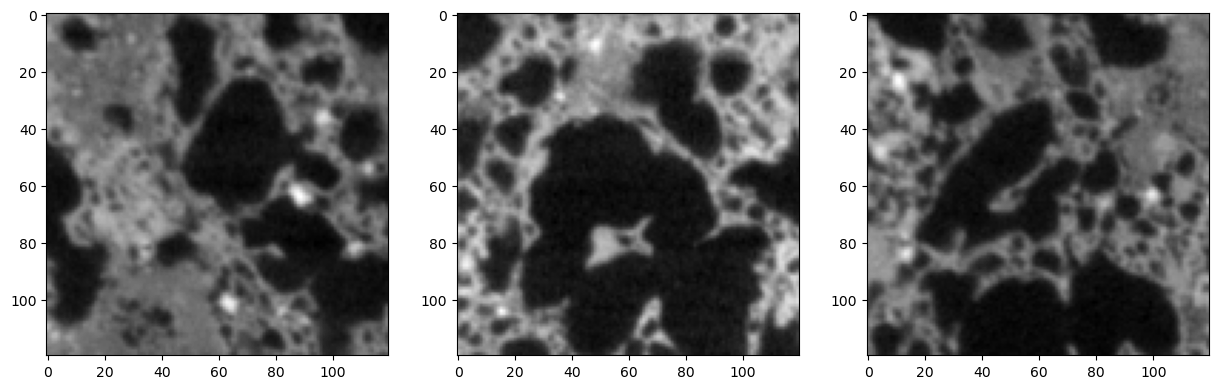

In [ ]:
# take a box of the image
i_pix = 300
im_box = im[i_pix:i_pix+n_pix,i_pix:i_pix+n_pix,i_pix:i_pix+n_pix]

# plot the box
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im_box[:,:,100], cmap='gray')

plt.subplot(1,3,2)
plt.imshow(im_box[:,100,:], cmap='gray')

plt.subplot(1,3,3)
plt.imshow(im_box[100,:,:], cmap='gray')

plt.show()

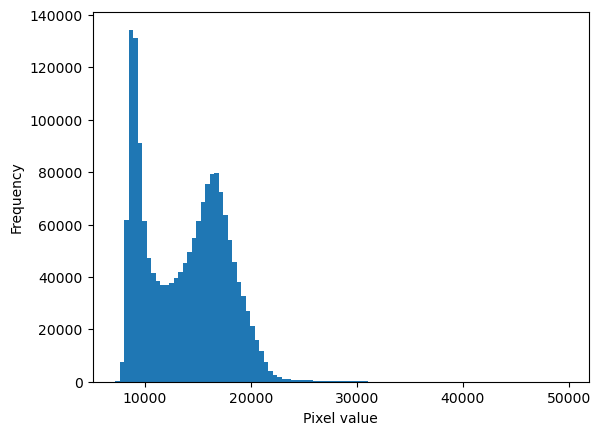

In [ ]:
# plot histogram of the box
import numpy as np
plt.hist(im_box.flatten(), bins=100)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

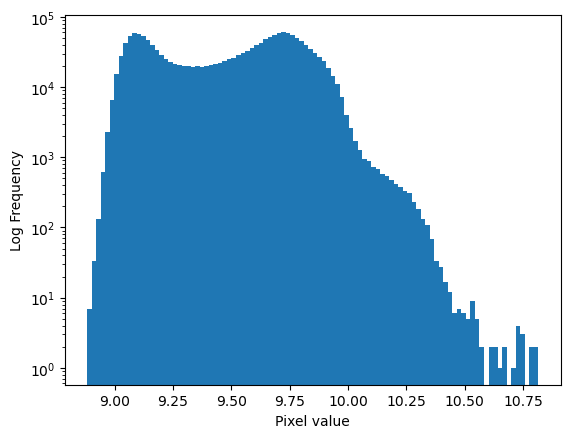

In [ ]:
# scale the histogram with log
plt.hist(np.log(im_box.flatten()), bins=100)
plt.xlabel('Pixel value')
plt.ylabel('Log Frequency')
# scale y axis to log
plt.yscale('log')

plt.show()

In [ ]:
# use otsu 
from skimage.filters import threshold_multiotsu
thresh = threshold_multiotsu(im_box)
print(thresh)

[12182 16594]


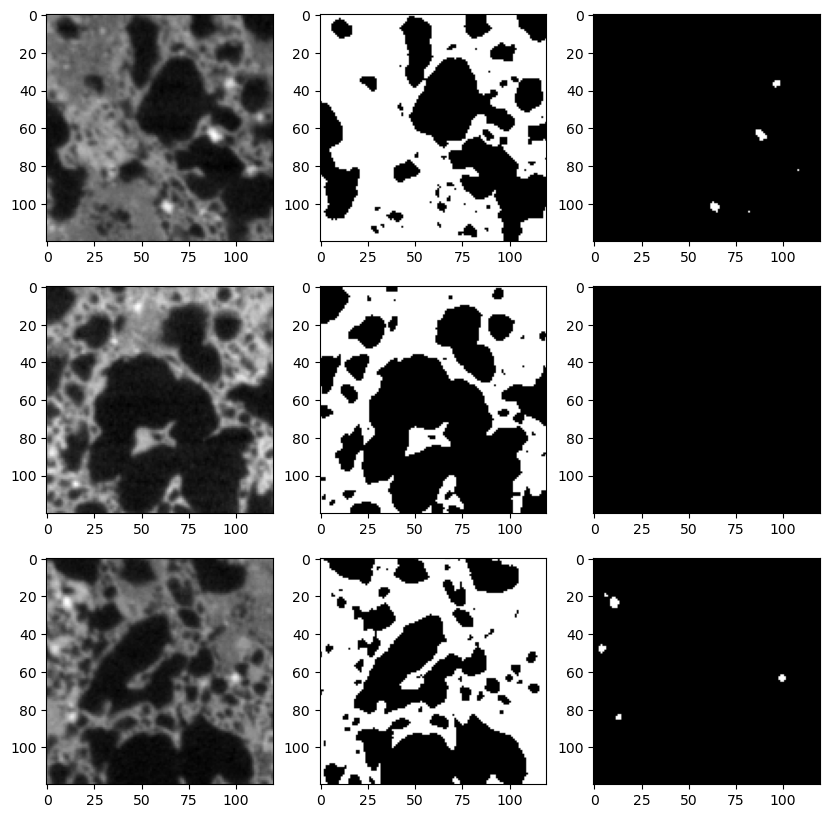

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(im_box[:,:,100], cmap='gray')

manual_upper = 24000

# im > thresh[0] and im < thresh is the mask for the first phase 
mask_stone = (im_box > thresh[0]) & (im_box < manual_upper)
# apply mask to the image
mask = np.zeros_like(im_box)
mask[mask_stone] = 2

plt.subplot(3,3,2)
plt.imshow(mask[:,:,100], cmap='gray')

plt.subplot(3,3,3)
plt.imshow(im_box[:,:,100]>manual_upper, cmap='gray')

plt.subplot(3,3,4)
plt.imshow(im_box[:,100,:], cmap='gray')

plt.subplot(3,3,5)
plt.imshow(mask[:,100,:], cmap='gray')

plt.subplot(3,3,6)
plt.imshow(im_box[:,100,:]>manual_upper, cmap='gray')

plt.subplot(3,3,7)
plt.imshow(im_box[100,:,:], cmap='gray')

plt.subplot(3,3,8)
plt.imshow(mask[100,:,:], cmap='gray')

plt.subplot(3,3,9)
plt.imshow(im_box[100,:,:]>manual_upper, cmap='gray')

plt.show()

In [ ]:
# make one mask for the whole image
mask = np.zeros_like(im)
mask_stone = (im > thresh[0]) & (im < manual_upper)
mask[mask_stone] = 1

mask_cr = im > manual_upper
mask[mask_cr] = 2

print(mask.shape)

# save the mask
dxchange.write_tiff(mask, fname='/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon_mask.tiff', overwrite=True)

(1018, 1024, 1004)


# Local thresholding

In [ ]:
from skimage.filters import threshold_local
import numpy as np

# first apply otsu to the whole image
thresh = threshold_otsu(im)

im_masked = im > thresh
im

# then apply local thresholding

block_size = 35
offset = 0

local_threshold = threshold_local(im, block_size, offset=offset)

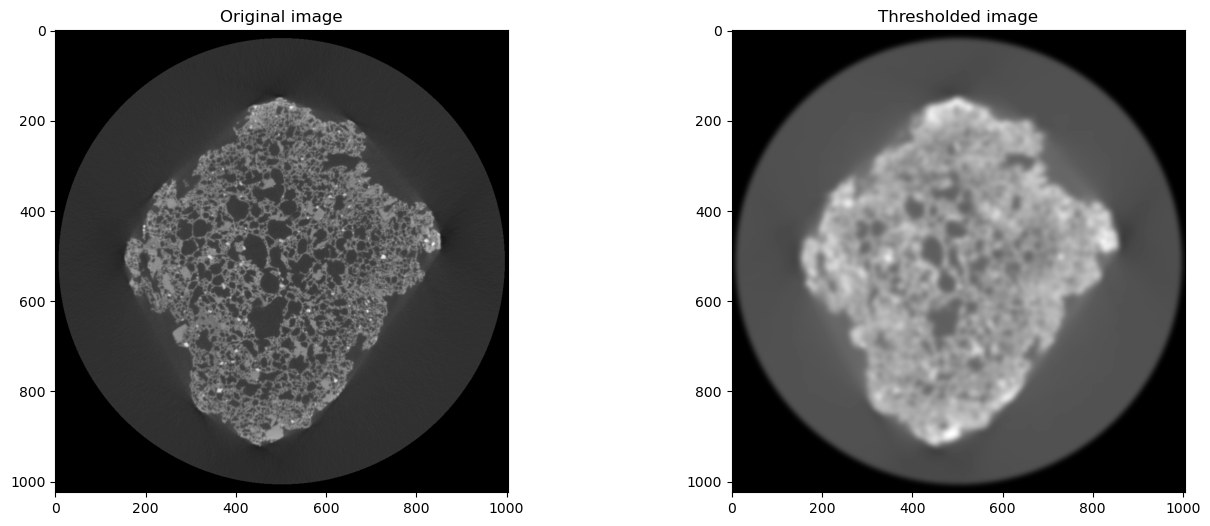

In [ ]:
# viz a slice
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].imshow(im[500,:,:], cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(local_threshold[500,:,:], cmap='gray')
ax[1].set_title('Thresholded image')

plt.show()

In [ ]:
im_box_slice_local = im > local_threshold
n_slice = 500

# viz a slice
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plt.imshow(im[n_slice,:,:], cmap='gray')
plt.title('Original image')

plt.subplot(2,3,4)
plt.imshow(im_box_slice_local[n_slice,:,:], cmap='gray')
plt.title('Thresholded image')

plt.subplot(2,3,2)
plt.imshow(im[:,n_slice,:], cmap='gray')

plt.subplot(2,3,5)
plt.imshow(im_box_slice_local[:,n_slice,:], cmap='gray')

plt.subplot(2,3,3)
plt.imshow(im[:,:,n_slice], cmap='gray')

plt.subplot(2,3,6)
plt.imshow(im_box_slice_local[:,:,n_slice], cmap='gray')

plt.show()

ValueError: operands could not be broadcast together with shapes (120,120,120) (1018,1024,1004) 

# Local thickness

13193


<BarContainer object of 24 artists>

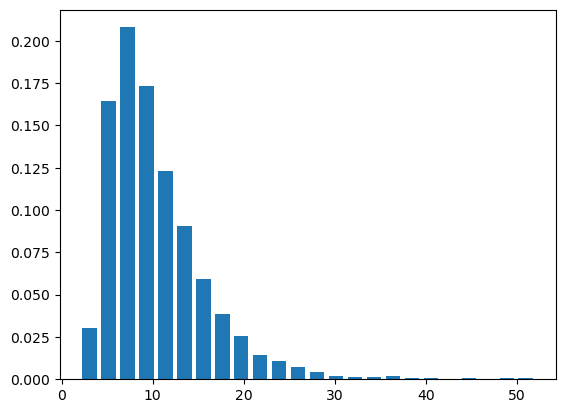

In [ ]:
import localthickness as lt
from skimage.filters import threshold_otsu

# take a box of the image
n_pix = 500
i_pix = 300
im_box = im[i_pix:i_pix+n_pix,i_pix:i_pix+n_pix,i_pix:i_pix+n_pix]

thresh = threshold_otsu(im_box)
print(thresh)

stone_segment = im > thresh

thickness = lt.local_thickness(stone_segment)

# save the thickness
dxchange.write_tiff(thickness, fname='/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon_thickness.tiff', overwrite=True)

# Save the maximum value of thickness
vmax = np.max(thickness)

# Compute the histogram of the thickness
histThk,binsThk = np.histogram(thickness.flatten(),bins=int(np.floor(vmax)-1), range=(1,np.ceil(vmax)), density=True)

# Compute the center of each bean
binsThkCent = binsThk[0:-1] + np.divide(binsThk[1:]-binsThk[0:-1],2)

# Plot the histogram as a bar plot for a better representatio
plt.bar(binsThkCent*1*2, histThk, width=0.8*1*2)

In [5]:
print("test")

test


In [ ]:
# Compute median and mean value of the thickness
t = thickness.flatten()
medianThick = np.median(t)
meanThick = np.mean(t)
print(f'Median: {medianThick}  |  Mean: {meanThick}')

Median: 0.0  |  Mean: 0.5195261240005493


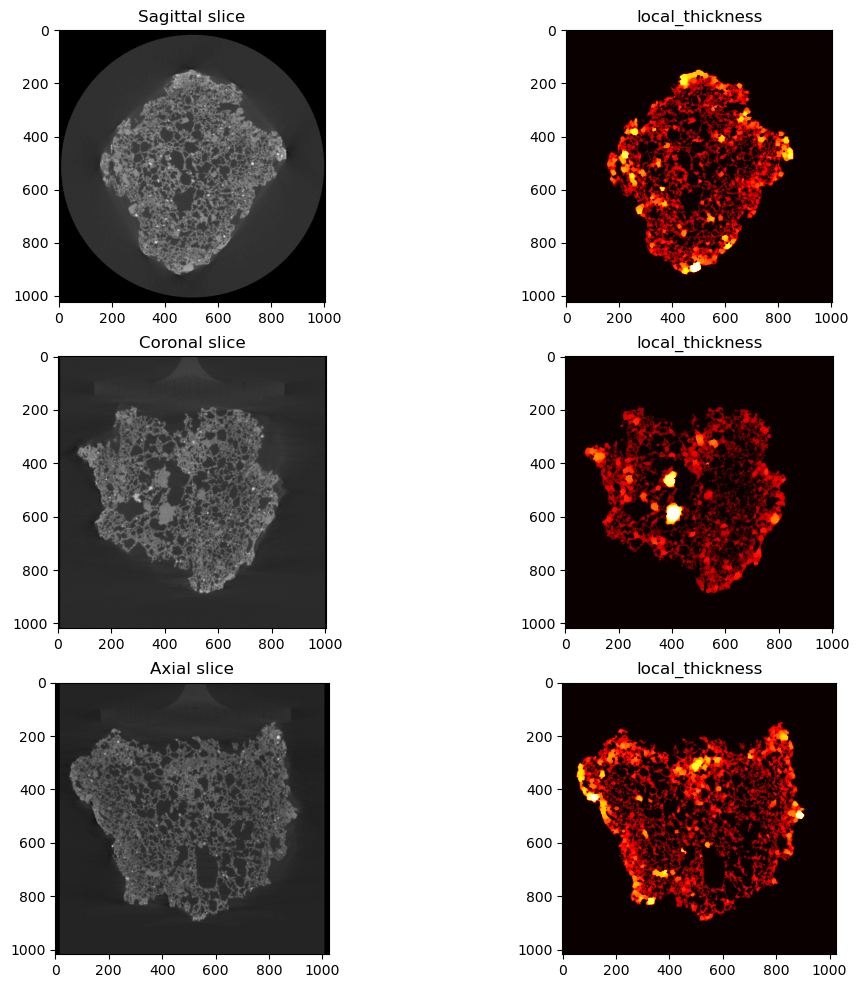

In [ ]:
slice_n = 500

#----------------Sagittal slice----------------
fig, ax = plt.subplots(3,2,figsize=(12,12))
ax[0][0].imshow(im[slice_n,:,:], cmap='gray')
ax[0][0].set_title('Sagittal slice')

ax[0][1].imshow(np.squeeze(thickness[slice_n,:,:]), cmap='hot')
ax[0][1].set_title('local_thickness')

#----------------Coronal view----------------

ax[1][0].imshow(im[:,slice_n,:], cmap='gray')
ax[1][0].set_title('Coronal slice')

ax[1][1].imshow(np.squeeze(thickness[:,slice_n,:]), cmap='hot')
ax[1][1].set_title('local_thickness')


#----------------Axial view----------------

ax[2][0].imshow(im[:,:,slice_n], cmap='gray')
ax[2][0].set_title('Axial slice')

ax[2][1].imshow(np.squeeze(thickness[:,:,slice_n]), cmap='hot')
ax[2][1].set_title('local_thickness')


plt.show()

# Investigate local thickness vs pixel value

In [ ]:
local_thick_flatten.max()

20.07486

Text(0, 0.5, 'Local thickness')

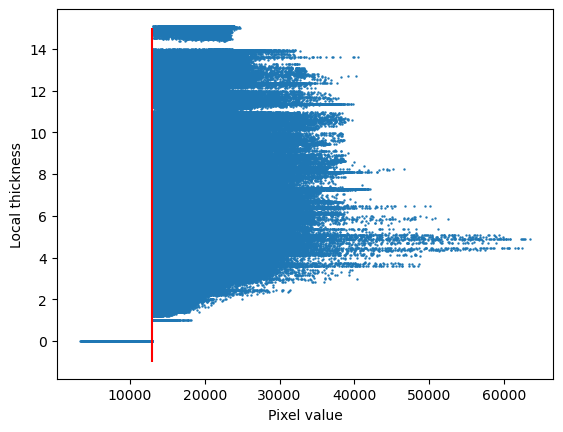

In [ ]:
im_box_flatten = im_box.flatten()
local_thick_flatten = thickness.flatten()

# scatter plot of the thickness vs the pixel value
plt.scatter(im_box_flatten, local_thick_flatten, s = 0.5)
plt.vlines(thresh,-1,15, color='r')
plt.xlabel('Pixel value')
plt.ylabel('Local thickness')

plt.show()

# Load mask/snake

In [1]:
path = "/dtu/3d-imaging-center/courses/02509/groups/members/s185231/project/snake1.tiff"

im_mask = dxchange.reader.read_tiff(path)


NameError: name 'dxchange' is not defined

In [3]:
# apply closing
from skimage.morphology import isotropic_closing, cube

im_mask_closed = isotropic_closing(im_mask, cube(50))

# viz a slice
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plt.imshow(im_mask[500,:,:], cmap='gray')

plt.subplot(2,3,2)
plt.imshow(im_mask[:,500,:], cmap='gray')

plt.subplot(2,3,3)
plt.imshow(im_mask[:,:,500], cmap='gray')

plt.subplot(2,3,4)
plt.imshow(im_mask_closed[500,:,:], cmap='gray')

plt.subplot(2,3,5)
plt.imshow(im_mask_closed[:,500,:], cmap='gray')

plt.subplot(2,3,6)
plt.imshow(im_mask_closed[:,:,500], cmap='gray')


NameError: name 'im_mask' is not defined

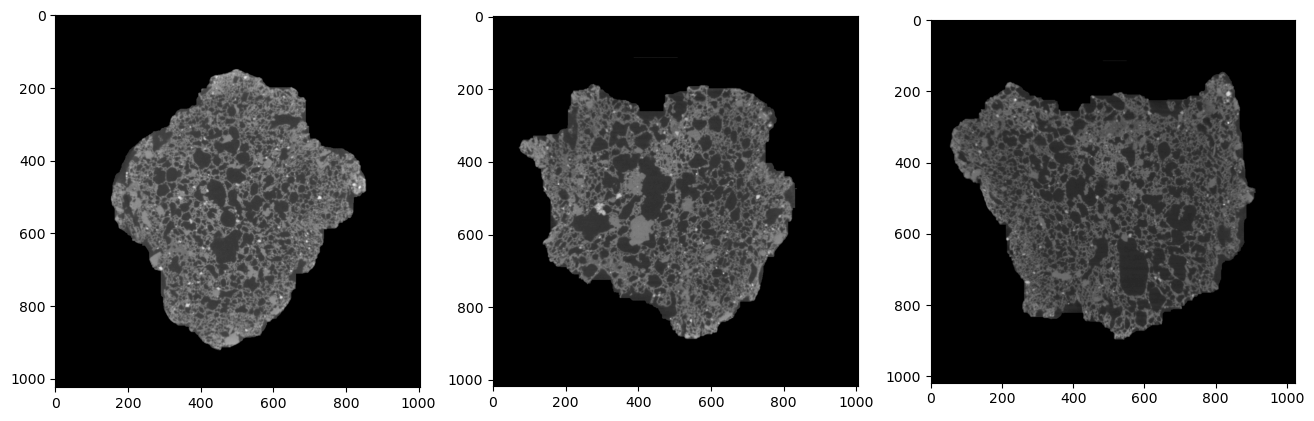

In [ ]:
# use mask on im

im_masked = im * im_mask_closed

# viz a slice
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(im_masked[500,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.imshow(im_masked[:,500,:], cmap='gray')

plt.subplot(1,3,3)
plt.imshow(im_masked[:,:,500], cmap='gray')

In [ ]:
# run otsu on the masked image
thresh = threshold_otsu(im_masked)

im_masked_thresh = im_masked[im_mask !=0] > thresh
print(thresh)


7055


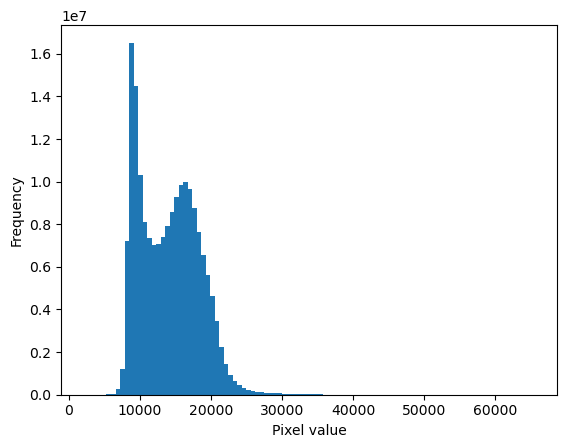

In [ ]:
# create histogram of the masked image

# remove zero values


plt.hist(im_masked[im_masked != 0].flatten(), bins=100)


plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# set thresholds

t_air = 13000
t_stone = 24000
t_crystal = 30000

mask_air = (im_masked > 1000) & (im_masked < t_air)
mask_stone = (im_masked > t_air) & (im_masked < t_stone)
mask_crystal = im_masked > t_crystal

